In [ ]:
#!pip3 install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
data=pd.read_csv("BDNS_sample_20210731.csv") ###To get predicted values for the whole dataset use BDNS_clean_20210731

In [ ]:
data.head()

,Admission_open_CON420,ADE_classif_CON490,Public_purpose_CON540,Nominative_grant_CON610,Public_call_CON620,Gender_impact_CON630,Third_party_country_TER100,Third_party_loaction_TER250,Third_party_legal_Spain_TER280,Third_party_type_TER290,...,SECTOR_CON550_HOUSEHOLD,SECTOR_CON550_EXTRATER,BENEFICIARY_FSA_CON580,BENEFICIARY_JSA_CON580,BENEFICIARY_PFA_CON580,BENEFICIARY_GRA_CON580,HELP_INSTR_OTROS_CON560,HELP_INSTR_SUBV_CON560,HELP_INSTR_PREST_CON560,HELP_INSTR_VENTA_CON560
0,N,N,12,N,1,2,ES,ES,SOCIEDADES CIVILES,PFA,...,0,0,0,0,1,0,0,1,0,0
1,N,N,16,N,1,3,ES,ES,CORPORACIONES LOCALES,JSA,...,0,0,0,1,0,0,0,1,0,0
2,N,N,11,N,1,2,ES,ES,ASOCIACIONES,JSA,...,0,0,0,1,0,0,0,1,0,0
3,N,N,12,N,1,2,ES,ES,SOCIEDADES DE RESPONSABILIDA LIMITADA,PFA,...,0,0,0,0,1,0,0,1,0,0
4,N,N,12,N,1,2,ES,ES,"COMUNIDADES DE BIENES, HERENCIAS YACENTES Y DE...",PFA,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91031 entries, 0 to 91030
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Admission_open_CON420           91031 non-null  object
 1   ADE_classif_CON490              91031 non-null  object
 2   Public_purpose_CON540           91031 non-null  int64 
 3   Nominative_grant_CON610         91031 non-null  object
 4   Public_call_CON620              91031 non-null  int64 
 5   Gender_impact_CON630            91031 non-null  int64 
 6   Third_party_country_TER100      91031 non-null  object
 7   Third_party_loaction_TER250     91031 non-null  object
 8   Third_party_legal_Spain_TER280  91031 non-null  object
 9   Third_party_type_TER290         83138 non-null  object
 10  Costs_CSU240                    91031 non-null  int64 
 11  Payment_full_PAG220             91031 non-null  int64 
 12  Tax_retention_PAG230            91031 non-null

In [ ]:
# features=["Admission_open_CON420", "ADE_classif_CON490","Public_purpose_CON540", "Nominative_grant_CON610",
#           "Public_call_CON620", "Gender_impact_CON630", "Third_party_country_TER100", 
#           "Third_party_loaction_TER250", "Third_party_legal_Spain_TER280", "Third_party_type_TER290",
#           "Third_party_region_TER310", "Costs_CSU240", "Grant_amount_CSU220", "Grant_aid_CSU250", 
#           "Grant_region_CSU260", "Payment_full_PAG220","Tax_retention_PAG230", "Help_instrument_CON560",
#           "Beneficiary_type_CON580", "Call_region_CON570"]
features=data.drop("SAN_dum",axis=1).columns
print(features)
X=data[features]
print(X.shape)
X.info()

Index(['Admission_open_CON420', 'ADE_classif_CON490', 'Public_purpose_CON540',
       'Nominative_grant_CON610', 'Public_call_CON620', 'Gender_impact_CON630',
       'Third_party_country_TER100', 'Third_party_loaction_TER250',
       'Third_party_legal_Spain_TER280', 'Third_party_type_TER290',
       'Costs_CSU240', 'Payment_full_PAG220', 'Tax_retention_PAG230',
       'Month_CSU210', 'Nawards_TER_110', 'Amount_awards_TER_110',
       'NATIONAL_CSU260', 'REGIONAL_CSU260', 'MUNICIPAL_CSU260',
       'NATIONAL_TER310', 'REGIONAL_TER310', 'MUNICIPAL_TER310', 'LOCAL_IMPL',
       'SECTOR_CON550_AGR', 'SECTOR_CON550_MINING', 'SECTOR_CON550_MANUF',
       'SECTOR_CON550_ELECTR', 'SECTOR_CON550_WATER', 'SECTOR_CON550_CONSTR',
       'SECTOR_CON550_RETAIL', 'SECTOR_CON550_TRANSP', 'SECTOR_CON550_ACCOM',
       'SECTOR_CON550_INFO', 'SECTOR_CON550_FIN', 'SECTOR_CON550_RESTAT',
       'SECTOR_CON550_SCI', 'SECTOR_CON550_ADMIN', 'SECTOR_CON550_SECUR',
       'SECTOR_CON550_EDUC', 'SECTOR_CON550_H

In [ ]:
for col in X:
    print(col)
    print(X[col].unique())
    print("-----------")

Admission_open_CON420
['N' 'S']
-----------
ADE_classif_CON490
['N' 'S']
-----------
Public_purpose_CON540
[12 16 11  5 10  6 14  4 17 18 15  8 13  9 20  7  1  3  2]
-----------
Nominative_grant_CON610
['N' 'S']
-----------
Public_call_CON620
[1 0]
-----------
Gender_impact_CON630
[2 3 1 4]
-----------
Third_party_country_TER100
['ES' 'other']
-----------
Third_party_loaction_TER250
['ES' 'other']
-----------
Third_party_legal_Spain_TER280
['SOCIEDADES CIVILES' 'CORPORACIONES LOCALES' 'ASOCIACIONES'
 'SOCIEDADES DE RESPONSABILIDA LIMITADA'
 'COMUNIDADES DE BIENES, HERENCIAS YACENTES Y DEMÃ\x81S ENTIDADES CARENTES DE PERSONALIDAD JURÃ\x8dDICA NO INCLUIDAS EXPRESAMENTE EN OTRAS CLAVES'
 'COMUNIDADES DE PROPIETARIOS EN RÃ‰GIMEN DE PROPIEDAD HORIZONTAL'
 'SOCIEDADES COOPERATIVAS' 'SOCIEDADES ANÃ“NIMAS'
 'CONGREGACIONES E INSTITUCIONES RELIGIOSAS' 'ORGANISMOS PÃšBLICOS'
 'OTROS TIPOS NO DEFINIDOS EN EL RESTO DE CLAVES'
 'Ã“RGANOS DE LA ADMINISTRACIÃ“N DEL ESTADO Y DE LAS COMUNIDADES AUTÃ“NO

In [ ]:
X["Admission_open_CON420"]=np.where(
    X["Admission_open_CON420"]=="N", 0, X["Admission_open_CON420"]
)
X["Admission_open_CON420"]=np.where(
    X["Admission_open_CON420"]=="S", 1, X["Admission_open_CON420"]
)

X["ADE_classif_CON490"]=np.where(
    X["ADE_classif_CON490"]=="N", 0, X["ADE_classif_CON490"]
)
X["ADE_classif_CON490"]=np.where(
    X["ADE_classif_CON490"]=="S", 1, X["ADE_classif_CON490"]
)

X["Nominative_grant_CON610"]=np.where(
    X["Nominative_grant_CON610"]=="N", 0, X["Nominative_grant_CON610"]
)
X["Nominative_grant_CON610"]=np.where(
    X["Nominative_grant_CON610"]=="S", 1, X["Nominative_grant_CON610"]
)

X["Tax_retention_PAG230"]=np.where(
    X["Tax_retention_PAG230"]=="N", 0, X["Tax_retention_PAG230"]
)
X["Tax_retention_PAG230"]=np.where(
    X["Tax_retention_PAG230"]=="S", 1, X["Tax_retention_PAG230"]
)

In [ ]:
# cat_cols=X.select_dtypes(include=['object']).columns
cat_cols=["Month_CSU210","Third_party_country_TER100","Third_party_loaction_TER250",
          "Third_party_legal_Spain_TER280","Third_party_type_TER290","Public_purpose_CON540",
         "Gender_impact_CON630"]

In [ ]:
#X = pd.get_dummies(X, columns = cat_cols, sparse=True)
X = pd.get_dummies(X, columns = cat_cols)
print(X.shape)
X.head()

(91031, 106)


,Admission_open_CON420,ADE_classif_CON490,Nominative_grant_CON610,Public_call_CON620,Costs_CSU240,Payment_full_PAG220,Tax_retention_PAG230,Nawards_TER_110,Amount_awards_TER_110,NATIONAL_CSU260,...,Public_purpose_CON540_14,Public_purpose_CON540_15,Public_purpose_CON540_16,Public_purpose_CON540_17,Public_purpose_CON540_18,Public_purpose_CON540_20,Gender_impact_CON630_1,Gender_impact_CON630_2,Gender_impact_CON630_3,Gender_impact_CON630_4
0,0,0,0,1,74584,76663,0,13,78877,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,337366,277932,0,28,134698,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,36333,37368,0,2,10155,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,1571,1575,0,16,36833,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,83459,85854,0,18,86363,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
for col in X:
    print(col)
    print(X[col].unique())
    print("-----------")

Admission_open_CON420
[0 1]
-----------
ADE_classif_CON490
[0 1]
-----------
Nominative_grant_CON610
[0 1]
-----------
Public_call_CON620
[1 0]
-----------
Costs_CSU240
[ 74584 337366  36333 ... 279106 295988 339555]
-----------
Payment_full_PAG220
[ 76663 277932  37368 ... 203349 269366 221454]
-----------
Tax_retention_PAG230
[0 1]
-----------
Nawards_TER_110
[ 13  28   2  16  18   1  10   9  19   3  21  58  12  23  69 158   5  55
   6  29  11  62  31   4  40  35  51  30  26  22  70  63  20  33  39  76
  54  27  92   7 131  25  15   8  61  41  38  17  64  32  24  36 189  86
  87  47 169  14  44  37 136 106 121 191  34  71 100 122  42 161  56 182
  45  49 152  77  65 165 129 137  53 160  98  48 126  85  52  73  81 103
 119 173 155  80  75  43 192 193  67 172  72 114  57  90  68 147  79 127
  94 174 132  46 177  50 120 188  93  74 148 156  84 183 107 170 149 162
  91 186  66 178  78 159  59 125 164 101 102  96 124 138 151  89 153 157
 146 185 111 140 171  82 116 128 108 145 133 175 141

In [ ]:
Y=data["SAN_dum"]
Y.value_counts()

0    90000
1     1031
Name: SAN_dum, dtype: int64

In [ ]:
Y_orig=Y.copy()

In [ ]:
# from baggingPU import BaggingClassifierPU
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# # import baggingPU
# bc = BaggingClassifierPU(
#     DecisionTreeClassifier(), n_estimators = 1000, n_jobs = -1, 
#     max_samples = sum(Y)  
# )
# bc.fit(X, Y)

BaggingClassifierPU(base_estimator=DecisionTreeClassifier(), max_samples=1031,
                    n_estimators=1000, n_jobs=-1)

Text(0, 0.5, 'count')

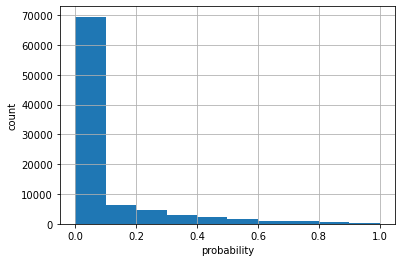

In [ ]:
# import pylab as pl
# output_bag = bc.oob_decision_function_[:,1]
# pd.Series(output_bag).hist()
# pl.xlabel("probability")
# pl.ylabel("count")

In [ ]:
# from sklearn.metrics import precision_score, recall_score, accuracy_score

# # print('Precision: ', precision_score(Y_orig, bc.predict(X)))
# # print('Recall: ', recall_score(Y_orig, bc.predict(X)))
# print('Accuracy: ', accuracy_score(Y_orig, bc.predict(X)))

Accuracy:  0.9541694587558085


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (63721, 106)
Training Labels Shape: (63721,)
Testing Features Shape: (27310, 106)
Testing Labels Shape: (27310,)


In [ ]:
bc = BaggingClassifierPU(
    DecisionTreeClassifier(), n_estimators = 1000, n_jobs = -1, 
    max_samples = sum(Y)  
)
bc.fit(X_train, Y_train)

BaggingClassifierPU(base_estimator=DecisionTreeClassifier(), max_samples=1031,
                    n_estimators=1000, n_jobs=-1)

In [ ]:
preds = bc.predict(X_test)

print('Precision: ', precision_score(Y_test, preds))
print('Recall: ', recall_score(Y_test, preds))
print('Accuracy: ', accuracy_score(Y_test, preds))

Precision:  0.2193050193050193
Recall:  0.9372937293729373
Accuracy:  0.9622848773343098


In [ ]:
preds = bc.predict(X)

In [ ]:
pd.Series(preds).value_counts()

0    86604
1     4427
dtype: int64

In [ ]:
preds_prob=bc.predict_proba(X)

<AxesSubplot:>

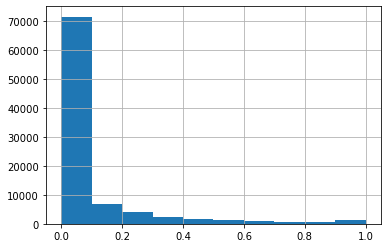

In [ ]:
pd.Series(preds_prob[:,1]).hist()

In [ ]:
preds_prob=pd.Series(preds_prob[:,1])
len(preds_prob)

91031

In [ ]:
X["predict_proba"]=preds_prob
X.sample(5)

,Admission_open_CON420,ADE_classif_CON490,Nominative_grant_CON610,Public_call_CON620,Costs_CSU240,Payment_full_PAG220,Tax_retention_PAG230,Nawards_TER_110,Amount_awards_TER_110,NATIONAL_CSU260,...,Public_purpose_CON540_15,Public_purpose_CON540_16,Public_purpose_CON540_17,Public_purpose_CON540_18,Public_purpose_CON540_20,Gender_impact_CON630_1,Gender_impact_CON630_2,Gender_impact_CON630_3,Gender_impact_CON630_4,predict_proba
84997,0,1,0,1,208432,210285,0,31,125469,1,...,0,0,0,0,0,1,0,0,0,0.000
46525,0,0,0,1,36733,37781,0,1,6006,0,...,0,0,0,0,0,0,0,1,0,0.216
60148,0,0,0,1,32299,33208,0,16,81172,0,...,0,0,0,0,0,0,1,0,0,0.000
12049,0,1,0,1,198755,200922,0,191,139008,0,...,0,0,0,0,0,0,0,1,0,0.233
55084,0,0,0,1,140734,87809,0,3,45244,0,...,0,0,0,1,0,0,0,1,0,0.026


In [ ]:
X["id"] = X.index + 1

In [ ]:
# import pandas as pd
X.to_csv ('BDNS_sample_predicted.csv', index = False, header=True)

In [ ]:
len(X[X["predict_proba"].isnull()])

0

<AxesSubplot:>

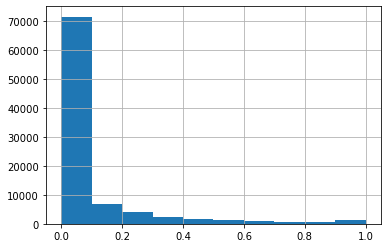

In [ ]:
X["predict_proba"].hist()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(dt)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [ ]:
shap_values = explainer.shap_values(X_train)

In [ ]:
shap_values[0]

array([[ 1.76068570e-04, -4.90187479e-05, -8.85644988e-05, ...,
         5.47123913e-06,  1.06741794e-04,  0.00000000e+00],
       [ 4.30509756e-05,  8.40319597e-06, -3.36288759e-05, ...,
         2.97207345e-05,  1.87828472e-04,  0.00000000e+00],
       [ 3.20167972e-05,  7.06660062e-05, -1.18758482e-04, ...,
         3.58078382e-05,  6.17531827e-05,  0.00000000e+00],
       ...,
       [ 9.95653442e-04,  2.83752099e-04, -8.80584064e-05, ...,
        -1.74446581e-05, -1.24916896e-03,  0.00000000e+00],
       [ 2.94770654e-05,  7.06660062e-05, -1.33454299e-04, ...,
         1.07873021e-05,  6.46749258e-05,  0.00000000e+00],
       [ 4.23168282e-04,  1.14423510e-04, -8.15394552e-05, ...,
        -6.77333392e-05, -1.16847873e-03,  0.00000000e+00]])

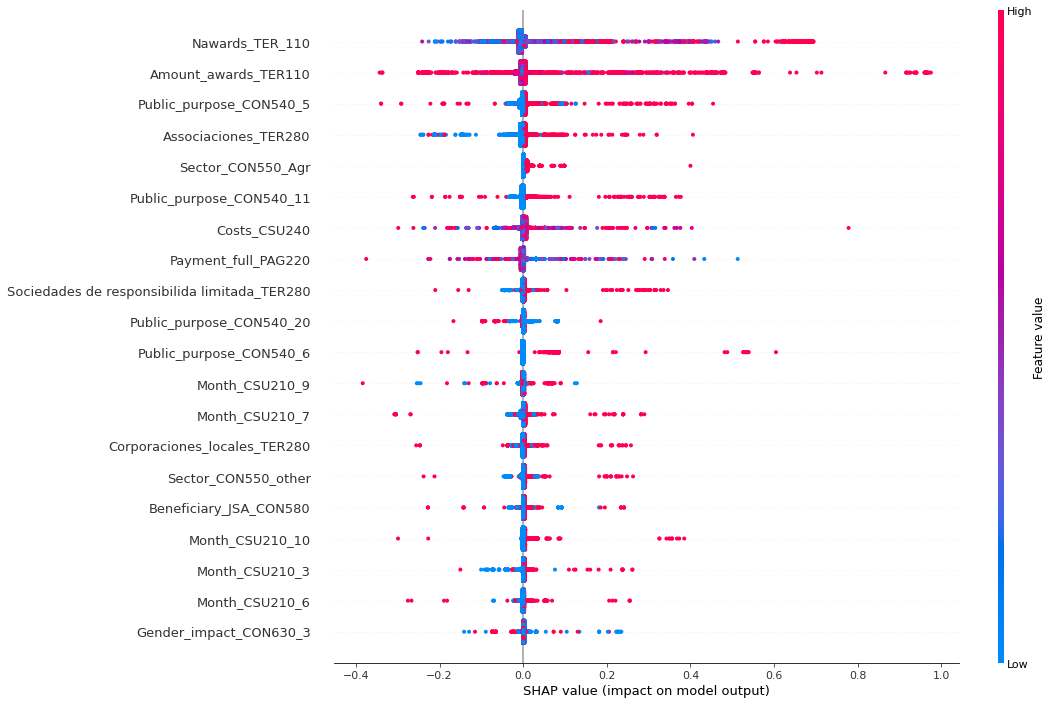

In [ ]:
shap.summary_plot(shap_values[1], X_train, plot_type='dot', show=False)
fig = plt.gcf()
fig.set_figheight(12)
fig.set_figwidth(14)
ax = plt.gca()
ylabels=['Gender_impact_CON630_3','Month_CSU210_6','Month_CSU210_3',
    'Month_CSU210_10','Beneficiary_JSA_CON580','Sector_CON550_other','Corporaciones_locales_TER280',
    'Month_CSU210_7', 'Month_CSU210_9','Public_purpose_CON540_6','Public_purpose_CON540_20',
    'Sociedades de responsibilida limitada_TER280','Payment_full_PAG220','Costs_CSU240','Public_purpose_CON540_11',
    'Sector_CON550_Agr','Associaciones_TER280','Public_purpose_CON540_5',
    'Amount_awards_TER110', 'Nawards_TER_110']
ax.set_yticklabels(ylabels)
plt.savefig("decision.png", transparent=True, bbox_inches = 'tight')

In [ ]:
# # source: https://www.kaggle.com/dansbecker/partial-dependence-plots
# from sklearn.inspection import plot_partial_dependence

# plot_partial_dependence(dt,features=[0, 2], X=X_train) 

X_train.columns

Index(['Admission_open_CON420', 'ADE_classif_CON490',
       'Nominative_grant_CON610', 'Public_call_CON620', 'Costs_CSU240',
       'Payment_full_PAG220', 'Tax_retention_PAG230', 'Nawards_TER_110',
       'Amount_awards_TER_110', 'NATIONAL_CSU260',
       ...
       'Public_purpose_CON540_14', 'Public_purpose_CON540_15',
       'Public_purpose_CON540_16', 'Public_purpose_CON540_17',
       'Public_purpose_CON540_18', 'Public_purpose_CON540_20',
       'Gender_impact_CON630_1', 'Gender_impact_CON630_2',
       'Gender_impact_CON630_3', 'Gender_impact_CON630_4'],
      dtype='object', length=106)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators = 1000,
    n_jobs = -1           
)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

Computing partial dependence plots...
done in 111.323s


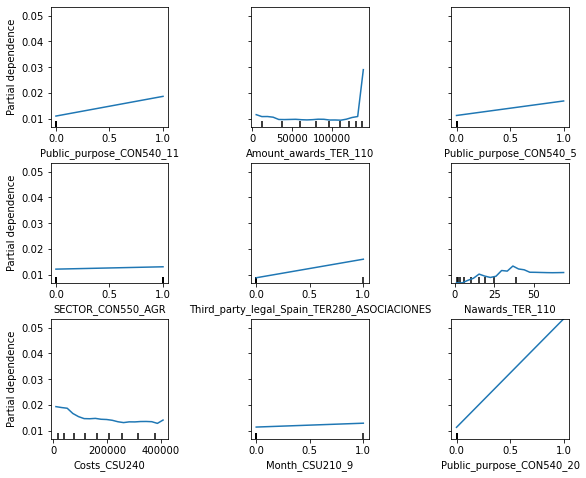

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from time import time

print('Computing partial dependence plots...')
tic = time()
features = ['Public_purpose_CON540_11', 'Amount_awards_TER_110', 'Public_purpose_CON540_5', 'SECTOR_CON550_AGR',
           'Third_party_legal_Spain_TER280_ASOCIACIONES', 'Nawards_TER_110', 'Costs_CSU240',
           'Month_CSU210_9', 'Public_purpose_CON540_20']

#display = plot_partial_dependence(
 #   rf, X_train, features, kind="average", subsample=50,
  #  n_jobs=3, grid_resolution=20, random_state=0
#)

display =plot_partial_dependence(
    rf, X_train, features, kind="average", subsample=50,
    n_jobs=3, grid_resolution=20, random_state=0
)
 
    
display.set_xlabels=('Public_purpose_CON540_11', 'Amount_awards_TER110',
         'Public_purpose_CON540_5', 'Sector_CON550_Agr',
         'Associaciones_TER280', 'Nawards_TER_110', 
         'Costs_CSU240', 'Month_CSU210_9', 'Public_purpose_CON540_20')




print(f"done in {time() - tic:.3f}s")

display.figure_.subplots_adjust(wspace = 0.7, hspace=0.3, left=0, right=1.2, bottom=0, top=1.5)
plt.savefig("dependency.png", transparent=True, bbox_inches = 'tight')